In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
class SpectralDecompositionPowerMethod:
    """
    Store the output vector in the object attribute self.components_ and the 
    associated eigenvalue in the object attribute self.singular_values_ 
 
    Why this code structure and attribute names? We are using the convention used by 
    the popular scikit-learn machine learning library:
    https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

    Parameters
        max_iter (int): maximum number of iterations to for the calculation
        tolerance (float): fractional change in solution to stop iteration early
        gamma (float): momentum parameter for the power method
        random_state (int): random seed for reproducibility
        store_intermediate_results (bool): whether to store the intermediate results as
            the power method iterates
        stored_eigenvalues (list): If store_intermediate_results is active, a list of 
            eigenvalues at each iteration
        stored_eigenvectors (list): If store_intermediate_results is active, a list of
            eigenvectors at each iteration
    
    """
    def __init__(self, 
        max_iter=1000, 
        tolerance=1e-5, 
        gamma=0.0,
        random_state=None, 
        store_intermediate_results=False
    ):
        self.max_iter = max_iter
        self.tolerance = tolerance
        self.gamma = gamma
        self.random_state = random_state
        
        self.singular_values_ = None
        self.components_ = None
        
        self.store_intermediate_results = store_intermediate_results
        if store_intermediate_results:
            self.stored_eigenvalues = list()
            self.stored_eigenvectors = list()
    
    def fit(self, A):
        """
        Perform the power method with random initialization, and optionally store
        intermediate estimates of the eigenvalue and eigenvectors at each iteration.
        You can add an early stopping criterion based on the tolerance parameter.
        Steps to follow:
        """
        # 1.  Start with a NxN matrix A
        n = A.shape[0]
        # 2.  Pick a random Nx1 vector v and convert it to a unit vector by scaling it with its own norm 
        np.random.seed(self.random_state)
        vec = np.random.random(n)
        vec = vec / np.linalg.norm(vec)

        if self.store_intermediate_results:
            self.stored_eigenvalues.append(1)
            self.stored_eigenvectors.append(vec)
            
        diff = 10 # just a placeholder for difference
        counts = 0 # to check how many times we've iterated
        while diff > self.tolerance:
            # 3.  Compute the matrix product of our matrix A with the random unit vector, and then update the vector
            prev = np.copy(vec)
            vec = A.dot(vec)
            # 4.  Re-normalize the resulting vector, producing a new unit vector v
            eig_val = np.linalg.norm(vec)
            vec = vec / eig_val
            vec = self.gamma * prev + (1 - self.gamma) * vec
            
            if self.store_intermediate_results:
                self.stored_eigenvalues.append(eig_val)
                self.stored_eigenvectors.append(vec)
            
            diff = np.mean(np.sqrt((vec - prev)**2 / prev**2))
            counts += 1
            # 5.  Repeat steps 2 and 3 until the elements of the output unit vector fluctuate less than a pre-specified tolerance
            if counts > self.max_iter:
                break
        
        if self.store_intermediate_results:
            self.stored_eigenvalues = np.array(self.stored_eigenvalues)
            self.stored_eigenvectors = np.array(self.stored_eigenvectors)
            
        self.singular_values_ = eig_val
        self.components_ = vec

210.8709627331107
Power method solution: 0.04834708743392474
Numpy solution: 0.04834705746733398


Text(0, 0.5, 'Power method eigenvector')

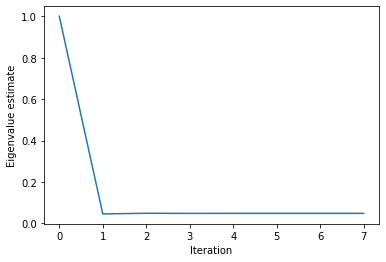

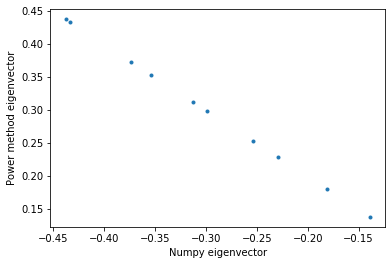

In [31]:
## Use the default eigensystem calculator in numpy as a point of comparison
def eigmax_numpy(A):
    """
    Compute the maximum eigenvalue and associated eigenvector in a matrix with Numpy.
    """
    eigsys = np.linalg.eig(A)
    ind = np.abs(eigsys[0]).argmax()
    return np.real(eigsys[0][ind]), np.real(eigsys[1][:, ind])


# np.random.seed(2) # for reproducibility
mm = np.random.random(size=(10, 10)) / 100
#mm = np.random.normal(size=(10, 10))# / 100 # these matrices fail to converge more often

print(np.linalg.cond(mm.T))
model = SpectralDecompositionPowerMethod(store_intermediate_results=True)
model.fit(mm);


print(f"Power method solution: {model.singular_values_}")
print(f"Numpy solution: {eigmax_numpy(mm)[0]}")

plt.figure()
plt.plot(model.stored_eigenvalues)
plt.xlabel("Iteration")
plt.ylabel("Eigenvalue estimate")

plt.figure()
plt.plot(eigmax_numpy(mm)[1], model.components_, '.')
plt.xlabel("Numpy eigenvector")
plt.ylabel("Power method eigenvector")

In [24]:
model.components_

array([0.33869007, 0.25729271, 0.26008555, 0.34454388, 0.32911168,
       0.24441285, 0.35232333, 0.36991335, 0.27988245, 0.3540912 ])